In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv') 

# Top 5 observations of the dataset

In [3]:
df.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Last 5 observations of the dataset

In [4]:
df.tail() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


# Data information

In [5]:
df.info() 
print("\nIn this dataset, there is a total of 4340 cars and 8 categories of information.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB

In this dataset, there is a total of 4340 cars and 8 categories of information.


# Checking for missing data

In [6]:
df.isnull().sum()
print("There is no missing data.")

There is no missing data.


# Creating a new column to find out how old the car is

In [7]:
from datetime import date
date.today().year
df['Car_Age']=date.today().year-df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


# Column Names

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Car_Age'],
      dtype='object')





# Categorical and Numerical Variables

In [9]:
df.nunique() 

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
Car_Age            27
dtype: int64

In [10]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Numerical Variables:
['year', 'selling_price', 'km_driven', 'Car_Age']


# Creating new columns: Brand and Model

In [11]:
df['Brand'] = df.name.str.split().str.get(0)

In [12]:
df['Model'] = df.name.str.split().str.get(1) + df.name.str.split().str.get(2)

In [13]:
df[['name','Brand','Model']]

,name,Brand,Model
0,Maruti 800 AC,Maruti,800AC
1,Maruti Wagon R LXI Minor,Maruti,WagonR
2,Hyundai Verna 1.6 SX,Hyundai,Verna1.6
3,Datsun RediGO T Option,Datsun,RediGOT
4,Honda Amaze VX i-DTEC,Honda,AmazeVX
...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Hyundai,i20Magna
4336,Hyundai i20 Magna 1.4 CRDi,Hyundai,i20Magna
4337,Maruti 800 AC BSIII,Maruti,800AC
4338,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6


# Check data entry errors and if they need data type conversion

In [14]:
print(df.Brand.unique())
print(df.Brand.nunique())

['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
29


In [15]:
df["Brand"].replace({"OpelCorsa": "Opel Corsa","Land":"Land Rover"}, inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age,Brand,Model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15,Maruti,800AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15,Maruti,WagonR
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10,Hyundai,Verna1.6
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5,Datsun,RediGOT
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8,Honda,AmazeVX


# Descriptive statistics of the data in the DataFrame

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0
Car_Age,4340.0,8.909217,4.215344,2.0,6.00,8.0,11.0,30.0


In [17]:
df.describe() 

,year,selling_price,km_driven,Car_Age
count,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,8.909217
std,4.215344,5.785487e+05,46644.102194,4.215344
min,1992.000000,2.000000e+04,1.000000,2.000000
25%,2011.000000,2.087498e+05,35000.000000,6.000000
50%,2014.000000,3.500000e+05,60000.000000,8.000000
75%,2016.000000,6.000000e+05,90000.000000,11.000000
max,2020.000000,8.900000e+06,806599.000000,30.000000


# Statistics summary of all data

In [18]:

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,4340,1491,Maruti Swift Dzire VDI,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,4340.0,NaN,NaN,NaN,2013.090783,4.215344,1992.0,2011.0,2014.0,2016.0,2020.0
selling_price,4340.0,NaN,NaN,NaN,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,NaN,NaN,NaN,66215.777419,46644.102194,1.0,35000.0,60000.0,90000.0,806599.0
fuel,4340,5,Diesel,2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,4340,3,Individual,3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,4340,2,Manual,3892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,4340,5,First Owner,2832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_Age,4340.0,NaN,NaN,NaN,8.909217,4.215344,2.0,6.0,8.0,11.0,30.0
Brand,4340,29,Maruti,1280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EXPLORATORY DATA ANALYSIS

# Maker of the Cars


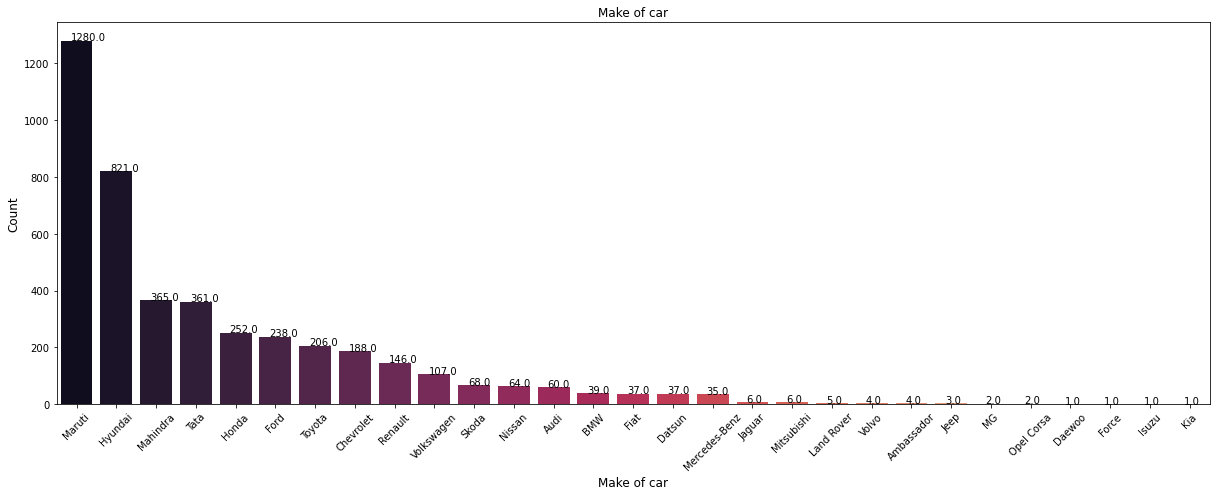

Of the 29 car makes, Maruti was the most common, with 1,280 cars, followed by Hyundai with 821. The least common car makers were Daewoo, Force, Isuzu and Kia, each only with one car.


In [19]:
#categorical bar chart
plt.rcParams["figure.figsize"] = [17.00, 7]
plt.rcParams["figure.autolayout"] = True

makebargraph = sns.countplot(data=df, x = "Brand", palette = "rocket",order = df['Brand'].value_counts().index)
plt.xlabel("Make of car", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Make of car")
plt.xticks(rotation=45)

for p in makebargraph.patches:
   makebargraph.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

print("Of the 29 car makes, Maruti was the most common, with 1,280 cars, followed by Hyundai with 821. The least common car makers were Daewoo, Force, Isuzu and Kia, each only with one car.")


# Car Models

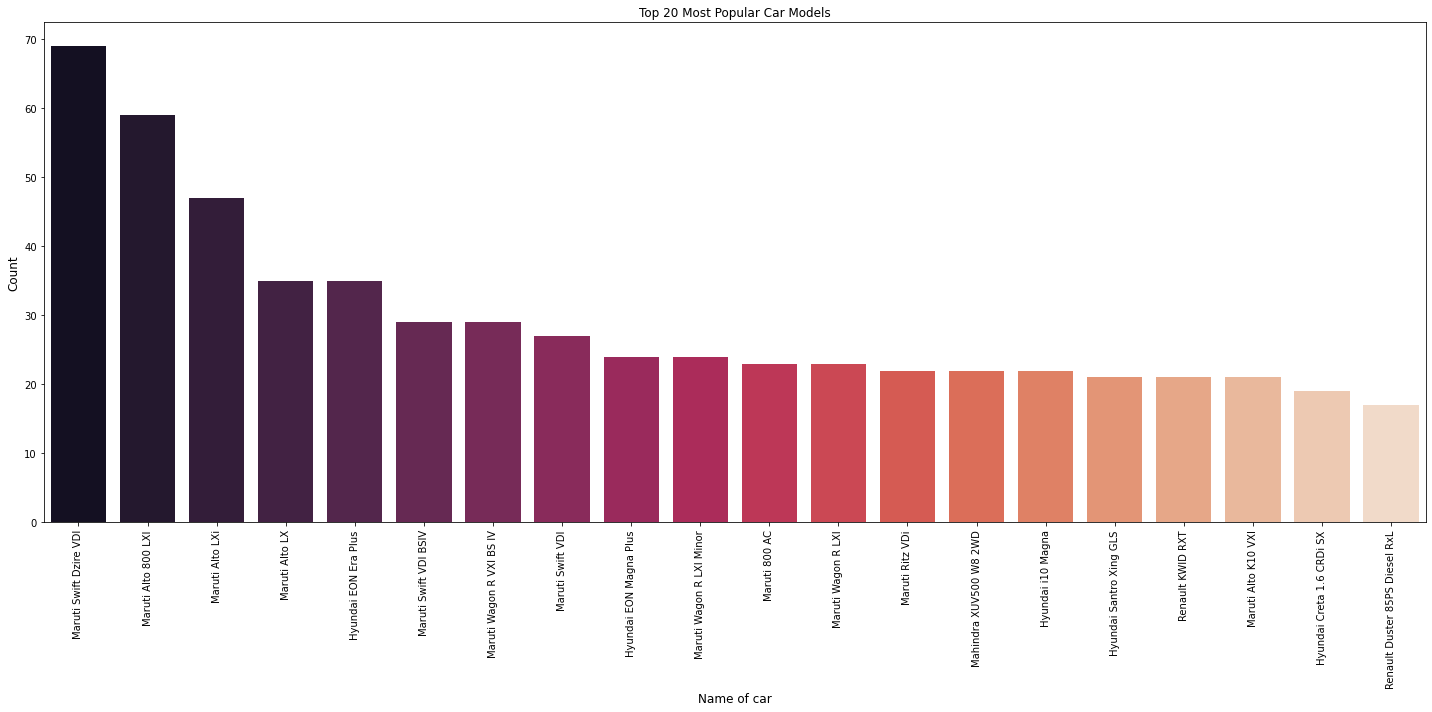

Of the top 20 car models, the Maruti Swift Dzire VDI was the most common, with 69 cars.  Maruti held 8 of the top 10 spots. Hyundai held spots 5 and 9


In [20]:
plt.rcParams["figure.figsize"] = [20.00, 10]
plt.rcParams["figure.autolayout"] = True

topnamesbargraph = sns.countplot(data=df, x = "name", palette = "rocket",order = df['name'].value_counts().head(20).index)
plt.xlabel("Name of car", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Top 20 Most Popular Car Models")
plt.xticks(rotation=90)

for p in makebargraph.patches:
   makebargraph.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

print("Of the top 20 car models, the Maruti Swift Dzire VDI was the most common, with 69 cars.  Maruti held 8 of the top 10 spots. Hyundai held spots 5 and 9")

# Year

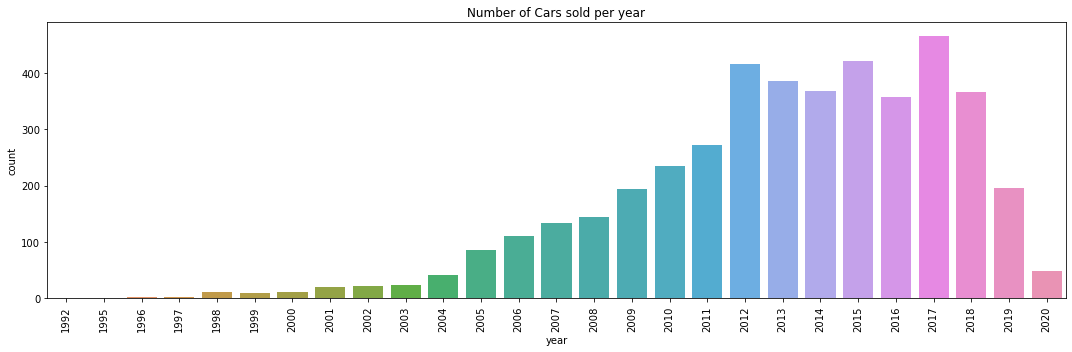

In 2017, most cars were sold. The plot is left skewed. It means that purchasing used cars was getting more popular as the years went by, but there was a sudden decrease in 2019 and 2020.


In [21]:
plt.figure(figsize=(15,5))
chart = sns.countplot(x='year', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Number of Cars sold per year')
plt.show()

print("In 2017, most cars were sold. The plot is left skewed. It means that purchasing used cars was getting more popular as the years went by, but there was a sudden decrease in 2019 and 2020.")

# Types of Fuel

In [22]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

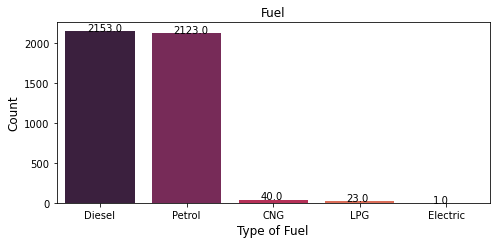

According to the bar graph, Diesel and Petrol were the two most common type of fuel used by the cars in this dataset, with Diesel being the most common with just 30 more cars. 
Electricity is the least commonly used, with only one car.


In [23]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fuelbargraph = sns.countplot(data=df, x = "fuel", palette = "rocket",order = df['fuel'].value_counts().index)
plt.xlabel("Type of Fuel", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Fuel")

for p in fuelbargraph.patches:
   fuelbargraph.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

print("According to the bar graph, Diesel and Petrol were the two most common type of fuel used by the cars in this dataset, with Diesel being the most common with just 30 more cars. \nElectricity is the least commonly used, with only one car.")

# Types of Sellers

In [24]:
df.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

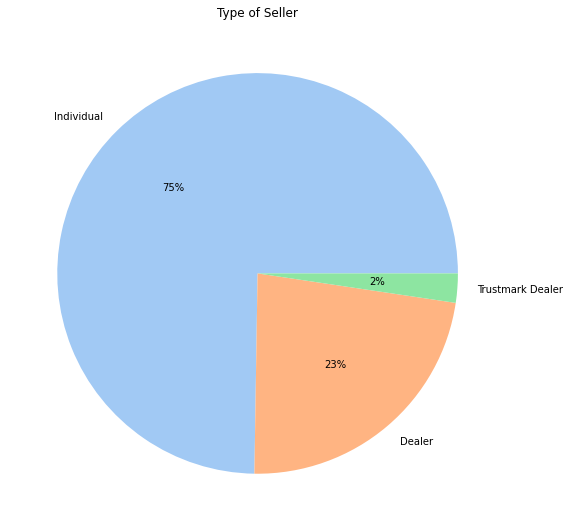

Above pie chart shows that the majority of the cars in this dataset is sold by individuals, which makes up 75%.
23% of the cars are sold by the dealers, followed by 2% of the cars, sold by Trustmark dealers.


In [25]:
labels = df["seller_type"].value_counts().index
sizes = df["seller_type"].value_counts()
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.f%%',colors=colors)
plt.title("Type of Seller", fontsize = 12)
plt.show()

print("Above pie chart shows that the majority of the cars in this dataset is sold by individuals, which makes up 75%.\n23% of the cars are sold by the dealers, followed by 2% of the cars, sold by Trustmark dealers.")

# Kilometers Driven

Total kilometers driven mean: 66215.77741935484
Total kilometers driven mode: 0    70000
Name: km_driven, dtype: int64
Total kilometers driven median: 60000.0
Total kilometers driven minimum: 1
Total kilometers driven maximum: 806599


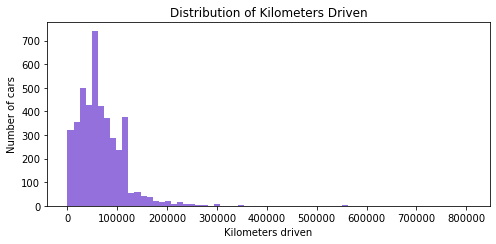


The average of the total kilometers driven by all cars is around 66215.
The amount of kilometers driven that appeared the most often in this dataset was 7000, which is the tallest bar in the above distribution.
The midpoint value, meaning the car with the amount of kilometers driven that is exactly in the middle compared to the other cars, had 6,000 kilometers driven. 

Above histogram of distribution of kilometers driven is a unimodal, somewhat symmetric with the exception of some outliers. Cars mostly had lower numbers of kilometers driven. Because there are some cars with higher numbers of kilometers driven, the histogram is skewed right, which shows that the mean is greater than the median.

The minimum number of the kilometers driven by these car was 1 km, with the maximum of 806599.


In [26]:
print("Total kilometers driven mean:", df['km_driven'].mean())
print("Total kilometers driven mode:", df['km_driven'].mode())
print("Total kilometers driven median:", df['km_driven'].median())
print("Total kilometers driven minimum:", df['km_driven'].min())
print("Total kilometers driven maximum:", df['km_driven'].max())

#histogram
plt.hist(df["km_driven"], bins = 66, color = "mediumpurple")
plt.xlabel("Kilometers driven")
plt.ylabel("Number of cars")
plt.title("Distribution of Kilometers Driven")
plt.show()


print("\nThe average of the total kilometers driven by all cars is around 66215.\nThe amount of kilometers driven that appeared the most often in this dataset was 7000, which is the tallest bar in the above distribution.\nThe midpoint value, meaning the car with the amount of kilometers driven that is exactly in the middle compared to the other cars, had 6,000 kilometers driven. ")
print("\nAbove histogram of distribution of kilometers driven is a unimodal, somewhat symmetric with the exception of some outliers. Cars mostly had lower numbers of kilometers driven. Because there are some cars with higher numbers of kilometers driven, the histogram is skewed right, which shows that the mean is greater than the median.")
print("\nThe minimum number of the kilometers driven by these car was 1 km, with the maximum of 806599.")


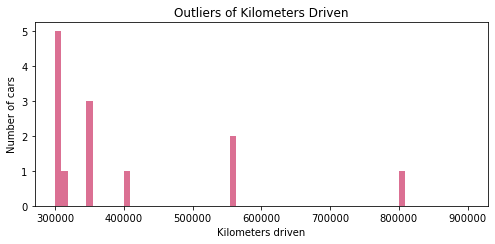

This histogram is to better visualize the outliers with at least 300,000 kilometers or more driven. Because they are very few with highest count of cars being 5, the datapoints are not quite visible in the previous Kilometers Driven histogram with all datasets


In [27]:
#Visualization foucsed on outliers
plt.hist(df["km_driven"], bins = 66, range=[300000, 900000], color = "palevioletred")
plt.xlabel("Kilometers driven")
plt.ylabel("Number of cars")
plt.title("Outliers of Kilometers Driven")
plt.show()

print("This histogram is to better visualize the outliers with at least 300,000 kilometers or more driven. Because they are very few with highest count of cars being 5, the datapoints are not quite visible in the previous Kilometers Driven histogram with all datasets")

# Transmission

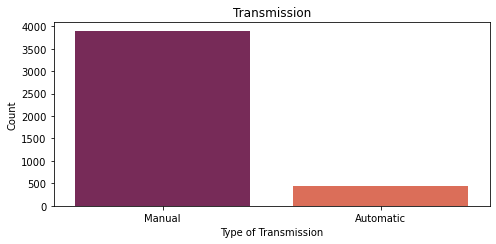

The majority of cars in this dataset has manual.


In [28]:
sns.countplot(data=df, x = "transmission", palette = "rocket")
plt.xlabel("Type of Transmission")
plt.ylabel("Count")
plt.title("Transmission")
plt.show()
print("The majority of cars in this dataset has manual.")

# Owner Type

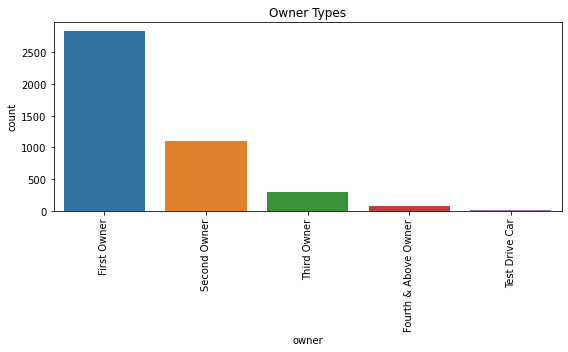

Majority of the cars is owned by first owner. Less cars were owned by more than one owner


In [29]:
plt.figure(figsize=(8,5))
chart = sns.countplot(x='owner', data=df, order = df['owner'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Owner Types')
plt.show()

print("Majority of the cars is owned by first owner. Less cars were owned by more than one owner")

# Selling Price by Fuel and Transmission types

Based on Fuel Type, Diesel cars have the highest price point and based on the transmission, Automatic Cars have higher price point.


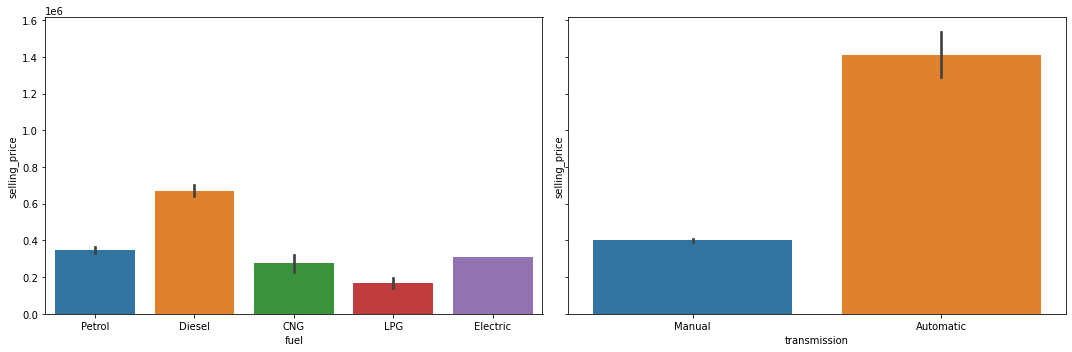

In [30]:
#relationship between Selling Price and Fuel type & Selling Price and Transmission type. 
fuel = df['fuel']
transmission = df['transmission']
selling_price = df['selling_price']
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
sns.barplot(x=fuel, y=selling_price, ax=axes[0])
sns.barplot(x=transmission, y=selling_price, ax=axes[1])

print("Based on Fuel Type, Diesel cars have the highest price point and based on the transmission, Automatic Cars have higher price point.")


# Selling Price by Year of Car

This scatterplot shows a relationship between the year of the car and the asking price. Newer cars command a higher price.


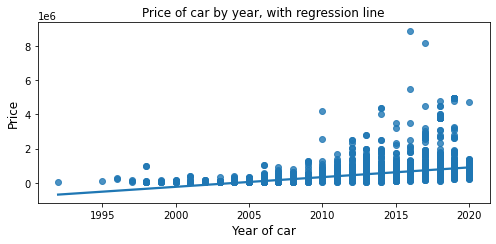

In [31]:
sns.regplot(x="year", y="selling_price", data=df, order=1, ci = None)
plt.xlabel("Year of car", fontsize = 12)
plt.ylabel("Price", fontsize = 12)
plt.title("Price of car by year, with regression line")
plt.xticks(rotation=0)

print("This scatterplot shows a relationship between the year of the car and the asking price. Newer cars command a higher price.")

# Comparison between Selling Price and Year by categorical values

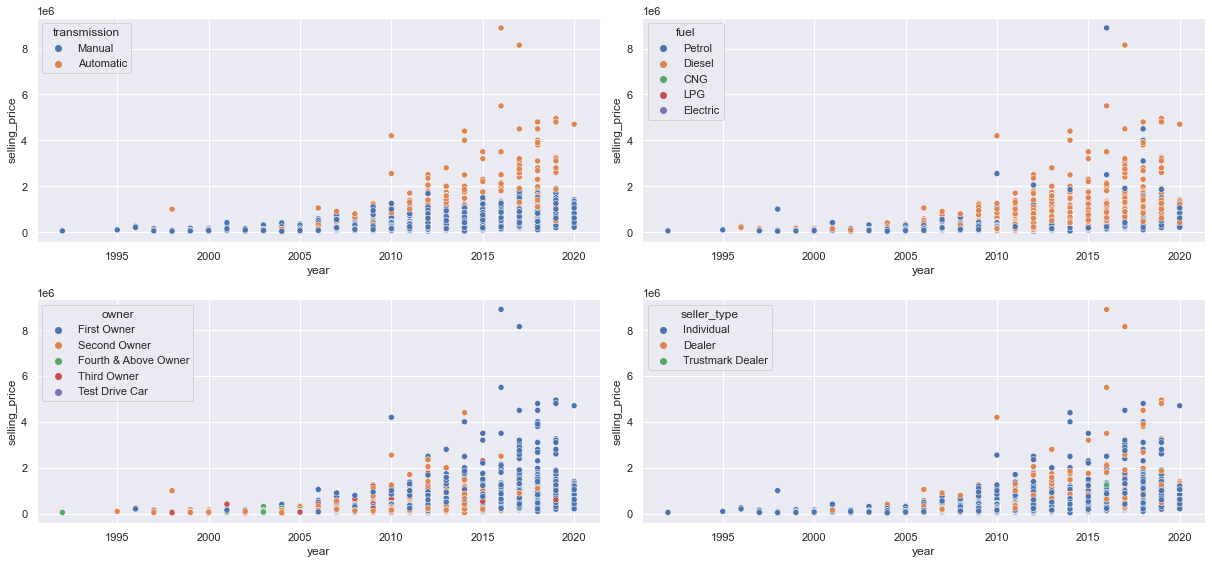

Latest Model Manual cars has less selling price as compared to Automatic one.
Most of diesel cars have high selling price followed by petrol cars.
Recent model cars owned by First owners has highest selling price as compared to others.
Most of the cars which has less selling price are sold by individuals.


In [32]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(17, 8))

sns.scatterplot(data=df, x="year", y="selling_price", hue='transmission', color="skyblue", ax=axs[0, 0])
sns.scatterplot(data=df, x="year", y="selling_price", hue='fuel', color="olive", ax=axs[0, 1])
sns.scatterplot(data=df, x="year", y="selling_price", hue='owner', color="olive", ax=axs[1, 0])
sns.scatterplot(data=df, x="year", y="selling_price", hue='seller_type', color="olive", ax=axs[1, 1])


plt.show()

print("Latest Model Manual cars has less selling price as compared to Automatic one.\nMost of diesel cars have high selling price followed by petrol cars.\nRecent model cars owned by First owners has highest selling price as compared to others.\nMost of the cars which has less selling price are sold by individuals.")

# Comparison between Selling Price and Kilometers Driven, by categorical values

Selling price minimum: 20000
Selling price maximum: 8900000


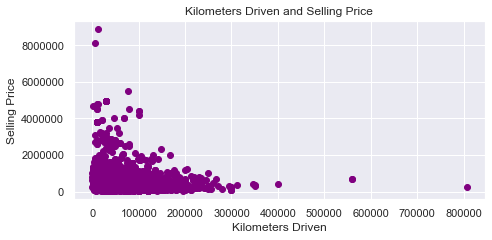

The scatterplot above shows relationship between Selling Price and Kilometers Driven. It looks like generally, the less car has been driven, the higher the car's selling price is. 


In [33]:
print("Selling price minimum:", df['selling_price'].min())
print("Selling price maximum:", df['selling_price'].max())

plt.scatter(df["km_driven"], df["selling_price"], color = "purple")
plt.title("Kilometers Driven and Selling Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.ticklabel_format(style='plain')
plt.show()

print("The scatterplot above shows relationship between Selling Price and Kilometers Driven. It looks like generally, the less car has been driven, the higher the car's selling price is. ")

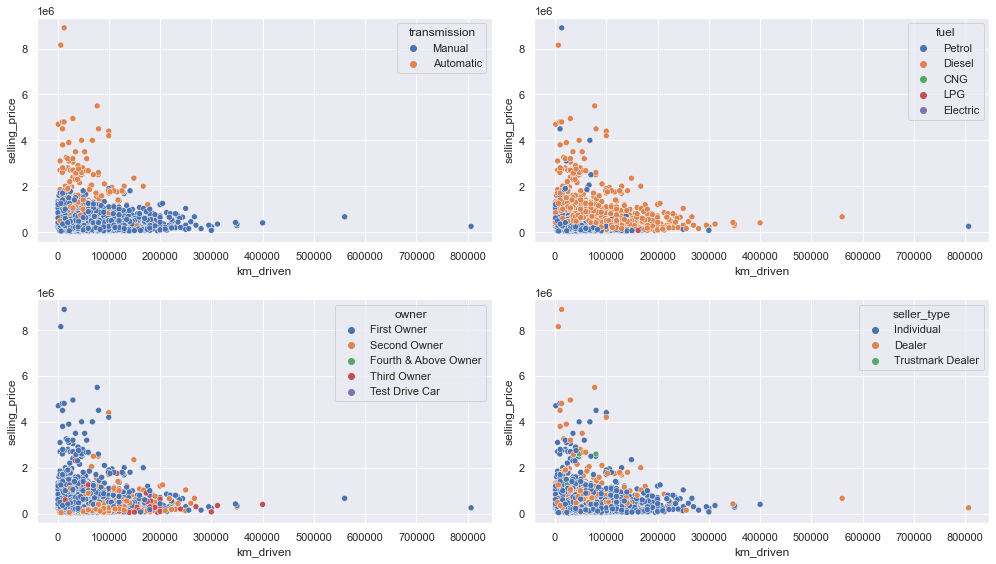

Less driven Manual cars are less expensive than Automatic one.
Less driven Diesel cars are expensive than Petrol version.
Most of the less driven cars belongs to First owners.


In [34]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

sns.scatterplot(data=df, x="km_driven", y="selling_price", hue='transmission', color="skyblue", ax=axs[0, 0])
sns.scatterplot(data=df, x="km_driven", y="selling_price", hue='fuel', color="olive", ax=axs[0, 1])
sns.scatterplot(data=df, x="km_driven", y="selling_price", hue='owner', color="olive", ax=axs[1, 0])
sns.scatterplot(data=df, x="km_driven", y="selling_price", hue='seller_type', color="olive", ax=axs[1, 1])

plt.show()

print("Less driven Manual cars are less expensive than Automatic one.\nLess driven Diesel cars are expensive than Petrol version.\nMost of the less driven cars belongs to First owners.")

# Comparison between Year and Kilometers Driven, by categorical values

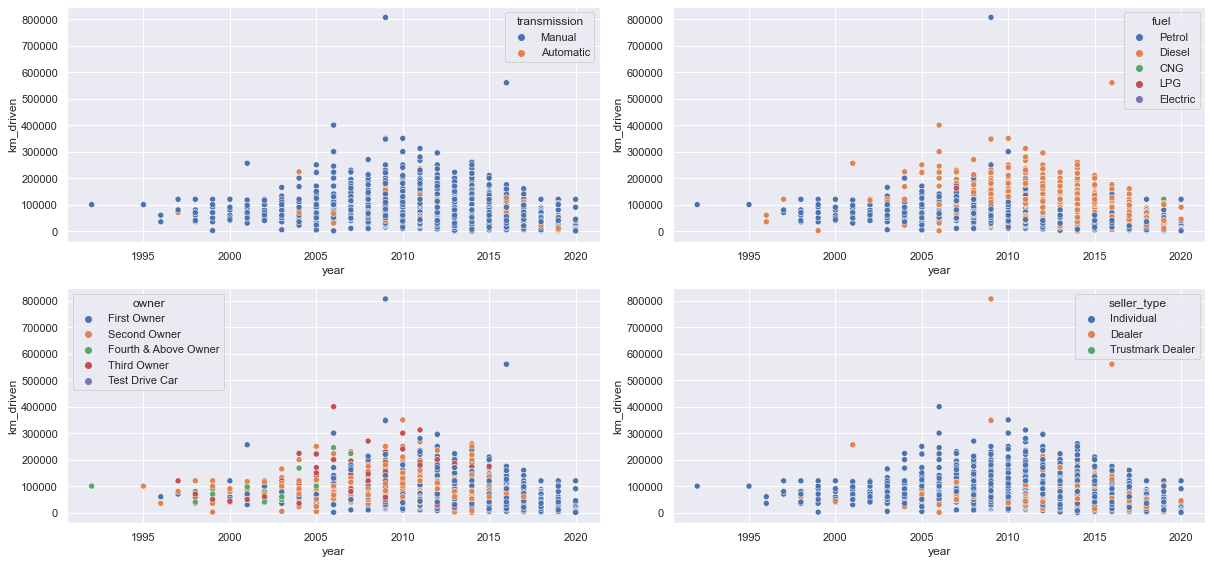

Most of the cars which are less driven are of manual transmission.
The latest cars which are less driven belongs to First owners.
Most of the cars which are less driven are sold by individuals over the period of time.


In [35]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(17, 8))

sns.scatterplot(data=df, x="year", y="km_driven", hue='transmission', color="skyblue", ax=axs[0, 0])
sns.scatterplot(data=df, x="year", y="km_driven", hue='fuel', color="olive", ax=axs[0, 1])
sns.scatterplot(data=df, x="year", y="km_driven", hue='owner', color="olive", ax=axs[1, 0])
sns.scatterplot(data=df, x="year", y="km_driven", hue='seller_type', color="olive", ax=axs[1, 1])


plt.show()


print("Most of the cars which are less driven are of manual transmission.\nThe latest cars which are less driven belongs to First owners.\nMost of the cars which are less driven are sold by individuals over the period of time.")

# Further Analysis

/Users/saraeum/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saraeum/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


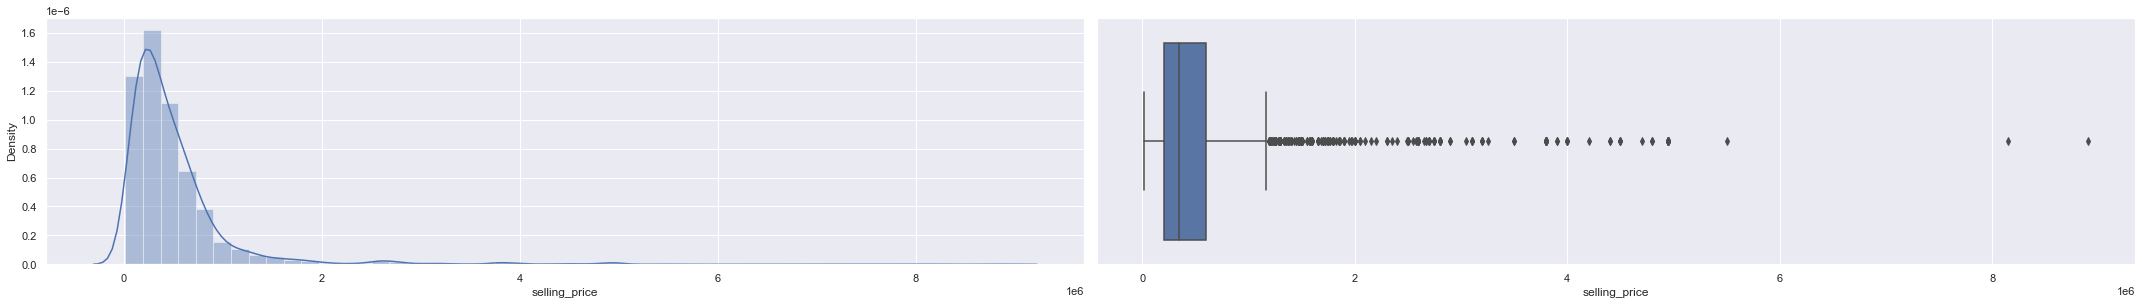

In [36]:
plt.figure(figsize=(30,8))
plt.subplot(2,2,1)
sns.distplot(df['selling_price'])
plt.subplot(2,2,2)
sns.boxplot(df['selling_price'])
plt.show()

/Users/saraeum/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saraeum/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


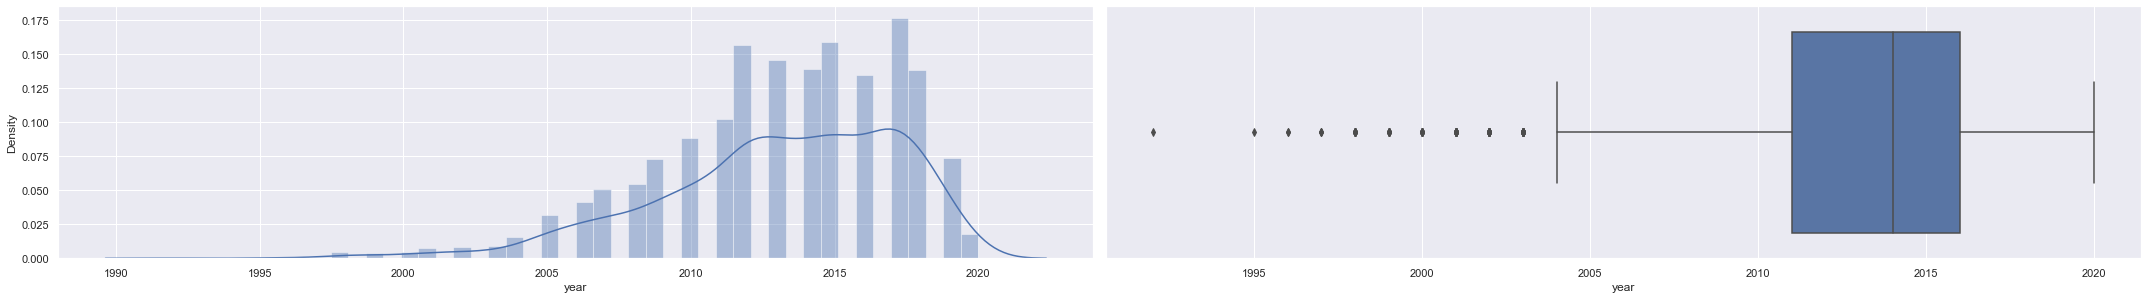

In [37]:
plt.figure(figsize=(30,8))
plt.subplot(2,2,1)
sns.distplot(df['year'])
plt.subplot(2,2,2)
sns.boxplot(df['year'])
plt.show()

/Users/saraeum/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saraeum/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


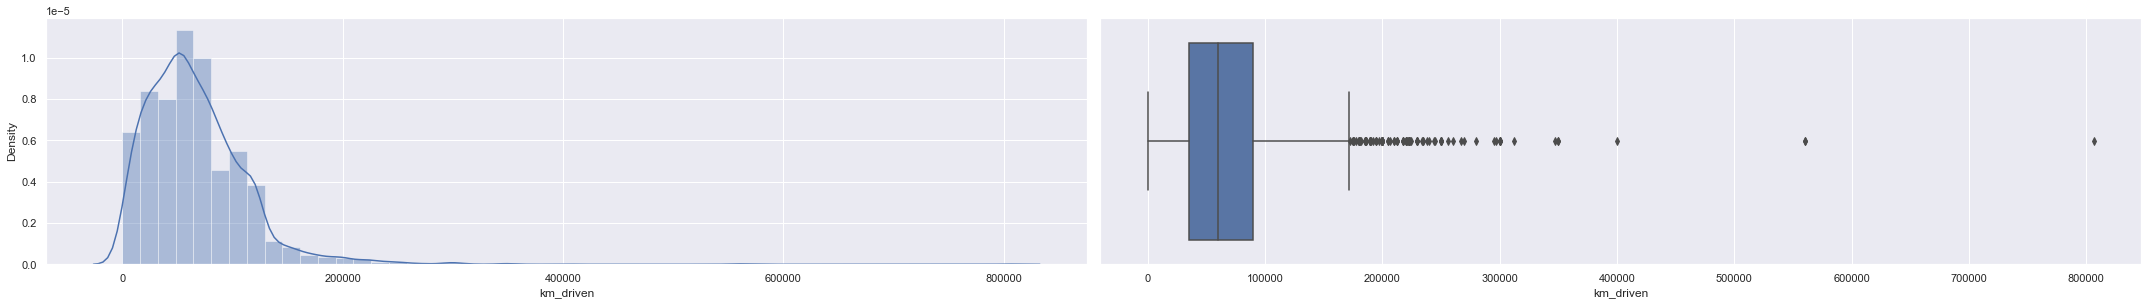

In [38]:
plt.figure(figsize=(30,8))
plt.subplot(2,2,1)
sns.distplot(df['km_driven'])
plt.subplot(2,2,2)
sns.boxplot(df['km_driven'])
plt.show()

/Users/saraeum/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saraeum/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


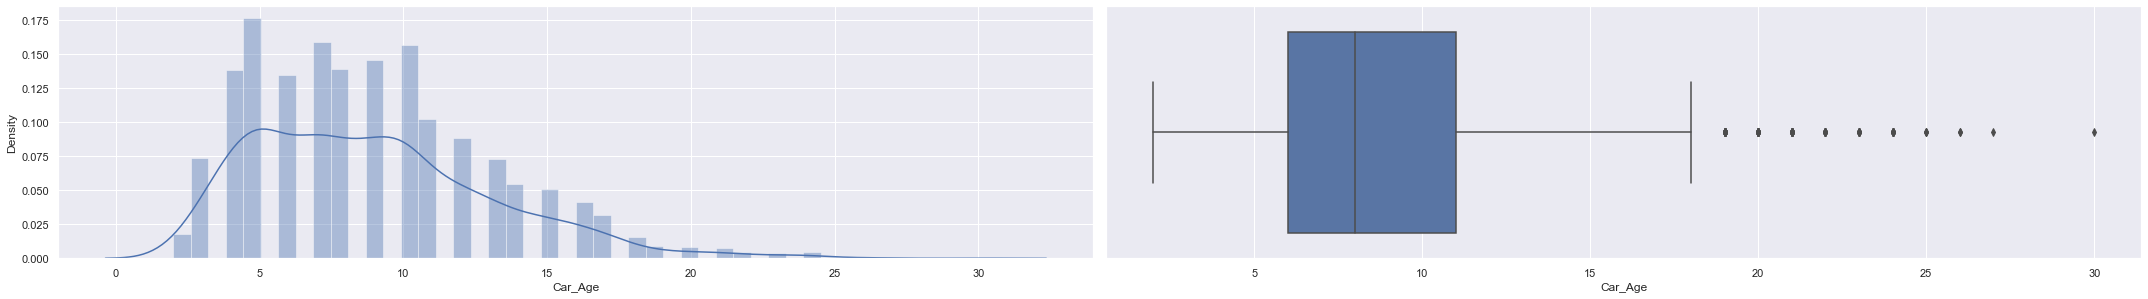

In [39]:
plt.figure(figsize=(30,8))
plt.subplot(2,2,1)
sns.distplot(df['Car_Age'])
plt.subplot(2,2,2)
sns.boxplot(df['Car_Age'])
plt.show()

In [40]:
print("OBSERVATIONS:\nVariable (Year) - Mean is less than mode and median. So,the distribution is negatively skewed to the left with Multi-model distribution. \nSelling price is positively skewed to the right with Unimodel distribution. The mean is greater than median.\nVariable (Car Age) is slightly skewed to the right with Multi-model distribution.The mean is greater than median.\nVariable (km_driven) positively skewed to the right with Uni model distribution. The mean is greater than median.")


OBSERVATIONS:
Variable (Year) - Mean is less than mode and median. So,the distribution is negatively skewed to the left with Multi-model distribution. 
Selling price is positively skewed to the right with Unimodel distribution. The mean is greater than median.
Variable (Car Age) is slightly skewed to the right with Multi-model distribution.The mean is greater than median.
Variable (km_driven) positively skewed to the right with Uni model distribution. The mean is greater than median.


# Multi-Variate Analysis

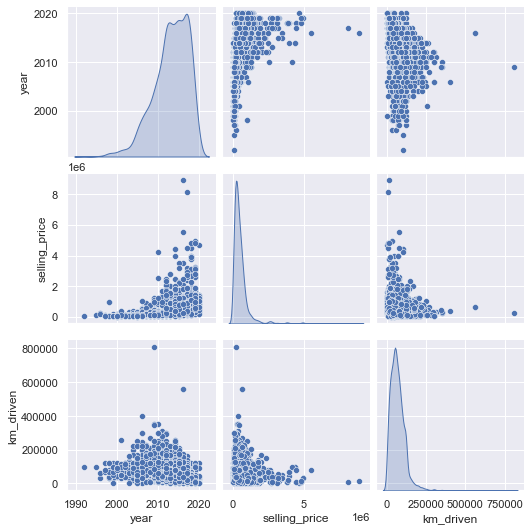

In [41]:
#Density curve

sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde') 

# Correlation by Heatmap

In [42]:
df.replace({'fuel':{'Petrol': 1,'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric':5}}, inplace=True)
df.replace({'seller_type': {'Individual': 1,'Dealer': 2, 'Trustmark Dealer': 3}}, inplace=True)
df.replace({'transmission': {'Manual': 1,'Automatic': 2}}, inplace=True)
df.replace({'owner':{'First Owner': 1,'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 3, 'Test Drive Car': 3}}, inplace=True)

In [43]:
df.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age
year,1.000000,0.413922,-0.419688,0.090388,0.182458,0.143800,-0.442272,-1.000000
selling_price,0.413922,1.000000,-0.192289,0.226883,0.240666,0.530205,-0.217085,-0.413922
km_driven,-0.419688,-0.192289,1.000000,0.274760,-0.187131,-0.120226,0.304986,0.419688
fuel,0.090388,0.226883,0.274760,1.000000,0.011358,0.027507,0.019877,-0.090388
seller_type,0.182458,0.240666,-0.187131,0.011358,1.000000,0.200191,-0.240864,-0.182458
transmission,0.143800,0.530205,-0.120226,0.027507,0.200191,1.000000,-0.085483,-0.143800
owner,-0.442272,-0.217085,0.304986,0.019877,-0.240864,-0.085483,1.000000,0.442272
Car_Age,-1.000000,-0.413922,0.419688,-0.090388,-0.182458,-0.143800,0.442272,1.000000


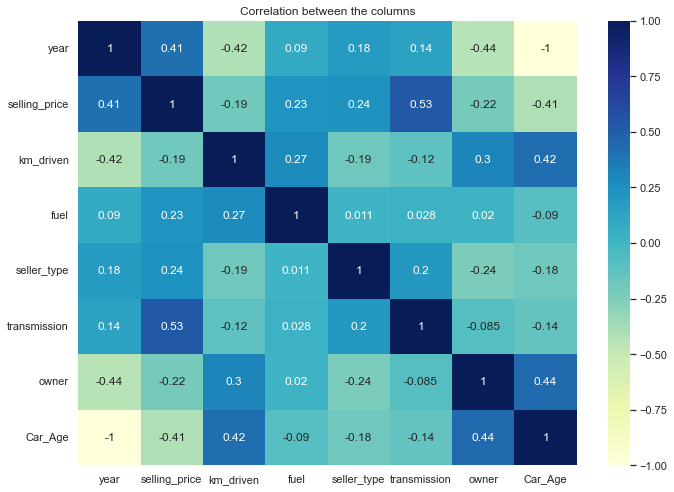

OBSERVATION:
Darker value indicate Higher correlation.
Lighter value indicate lower correlation.
The diagonals are all 1/Dark Blue because those squares are correlating each variable to itself which is a  perfect correlation.
Selling price is positively correlated to year [0.41].
Selling price is highlt correlated to transmission [0.53].
Kilometer driven is negatively correlated to year [-0.42]
Kilometer driven positively correlated to Car Age [0.42]
Car Age is negatively correlated to year [-1].
Car Age is negatively correlated to selling Price [-0.41]


In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, vmin = -1, cmap = 'YlGnBu')
plt.title('Correlation between the columns')
plt.show()


print("OBSERVATION:\nDarker value indicate Higher correlation.\nLighter value indicate lower correlation.\nThe diagonals are all 1/Dark Blue because those squares are correlating each variable to itself which is a  perfect correlation.\nSelling price is positively correlated to year [0.41].\nSelling price is highlt correlated to transmission [0.53].\nKilometer driven is negatively correlated to year [-0.42]\nKilometer driven positively correlated to Car Age [0.42]\nCar Age is negatively correlated to year [-1].\nCar Age is negatively correlated to selling Price [-0.41]")


# FINAL OBSERVATION


# Of the 29 car makes, Maruti was the most common, with 1280 cars, followed by Hyundai with 821.

# Of the top 20 car models, the Maruti Swift Dzire VDI was the most common, with 69 cars.  Maruti held 8 of the top 10 spots. Hyundai held spots 5 and 9.

#  So, the most common selling cars among all models are Maruti and Hyundai.


# The greatest number of cars were built in 2017.  The distribution by year is unimodal, with the peak in between years 2011 and 2018, and skews left.


# Newer cars has a higher price.

# Based on Fuel Type, Diesel cars have high price point and based on the transmission, Automatic Cars have higher price point.

# Latest Model Manual cars has less selling price as compared to Automatic one.


# Customers are most interested in purchasing latest model manual transmission diesel car  followed by petrol version because those are  sold by Individuals and owned by first owners.





# DEPENDING UPON OVERALL ANALYSIS, SINCE BOTH DIESEL AND PETROL CARS ARE IN DEMAND.


# PEOPLE WOULD PREFER LATEST MODEL MANUAL TRANSMISSION  DIESEL CARS IF THEY HAVE HIGH BUDGET SINCE THE SELLING PRICE IS HIGH. MOST OF THE CARS ARE SOLD BY THE INDIVIDUALS WHO ARE FIRST OWNERS.


# ALSO, PEOPLE WOULD PREFER LATEST MODEL MANUAL PETROL CARS IF THEY HAVE LITTLE LOWER BUDGET SINCE THE SELLING PRICE FOR PETROL VERSION IS COMPARATIVELY LOWER THAN DIESEL VERSION. THESE CARS ARE ALSO SOLD BY THE INDIVIDUALS WHO ARE FIRST OWNERS.
